Importing Libraries

In [1]:
import IPython.display as ipd
import torch
import matplotlib
import os

from bertron import Bertron

%matplotlib inline

Setting up directories, devices, and config files

In [2]:
MODEL_DIR = 'model_weights'

DETECTRON_CFG_FILE = \
    'detectron2/configs/COCO-Detection/faster_rcnn_X_101_64x4d_FPN_2x_vlp.yaml'

BERT_CFG_FILE = 'VLP/configs/bert_for_captioning.json'

WAVEGLOW_CFG_FILE = 'tacotron2/waveglow/config.json'

OBJ_VOCAB_FILE = 'vocab/objects_vocab.txt'

SAMPLING_RATE = 22050

# For 99% of environments the below is correct 
# this demo requires an NVIDIA GPU (Min 5GB VRAM) & CUDA
CPU_DEVICE = torch.device('cpu')
GPU_DEVICE = torch.device('cuda:0')

Now we need to know where to find the pretrained weights for the detector, the bert decoder, mel spectrometer generator (tacotron) and the audio generator (waveglow)

In [3]:
detector_weights_path = \
    os.path.join(MODEL_DIR, 'detectron/e2e_faster_rcnn_X-101-64x4d-FPN_2x-vlp.pkl')

bert_weights_path = os.path.join(MODEL_DIR, 'bert/model.19.bin')

tacotron_path = os.path.join(MODEL_DIR, 'tacotron2/tacotron2_statedict.pt')
waveglow_path = os.path.join(MODEL_DIR, 'waveglow/waveglow_256ch_state_dict.pt')

Finally we can now create a Bertron

In [4]:
bertron = Bertron(DETECTRON_CFG_FILE, detector_weights_path, BERT_CFG_FILE, 
                  bert_weights_path, OBJ_VOCAB_FILE, tacotron_path, WAVEGLOW_CFG_FILE,
                  waveglow_path, CPU_DEVICE, GPU_DEVICE, sampling_rate=SAMPLING_RATE)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [5]:
# I'm going to try something different and guide the demo via the produced tts system

audio = bertron.tts('Now that a Bertron is loaded and initialized, we can analyze any image on the internet if you have the URL by calling Bertron on the URL')
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

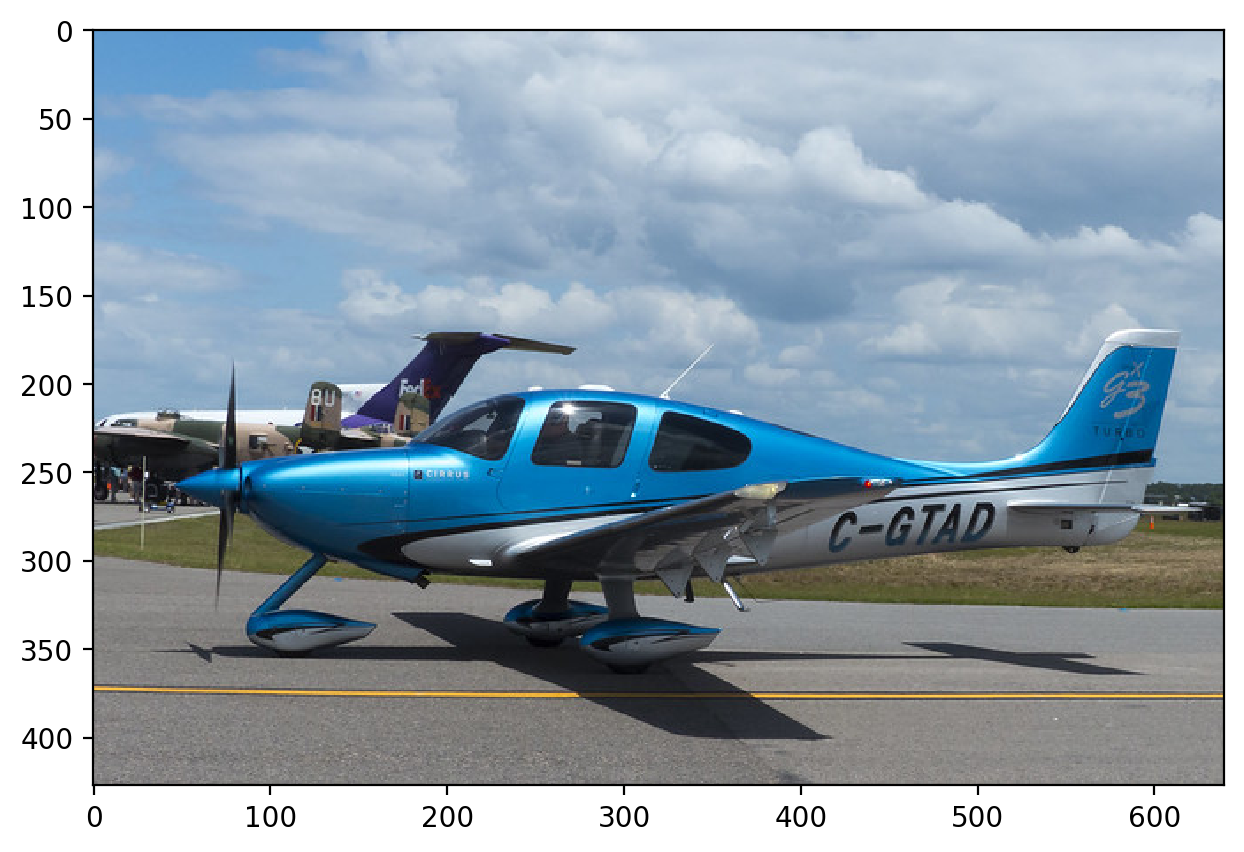

In [6]:
audio = bertron("http://farm9.staticflickr.com/8527/8636833960_10e0fe2bac_z.jpg")
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

In [7]:
audio = bertron.tts('Hmmm, that\'s all well and good but it would be nice to see what the Neural Network "sees", no problem! we can turn on visualization with the visualize flag')
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

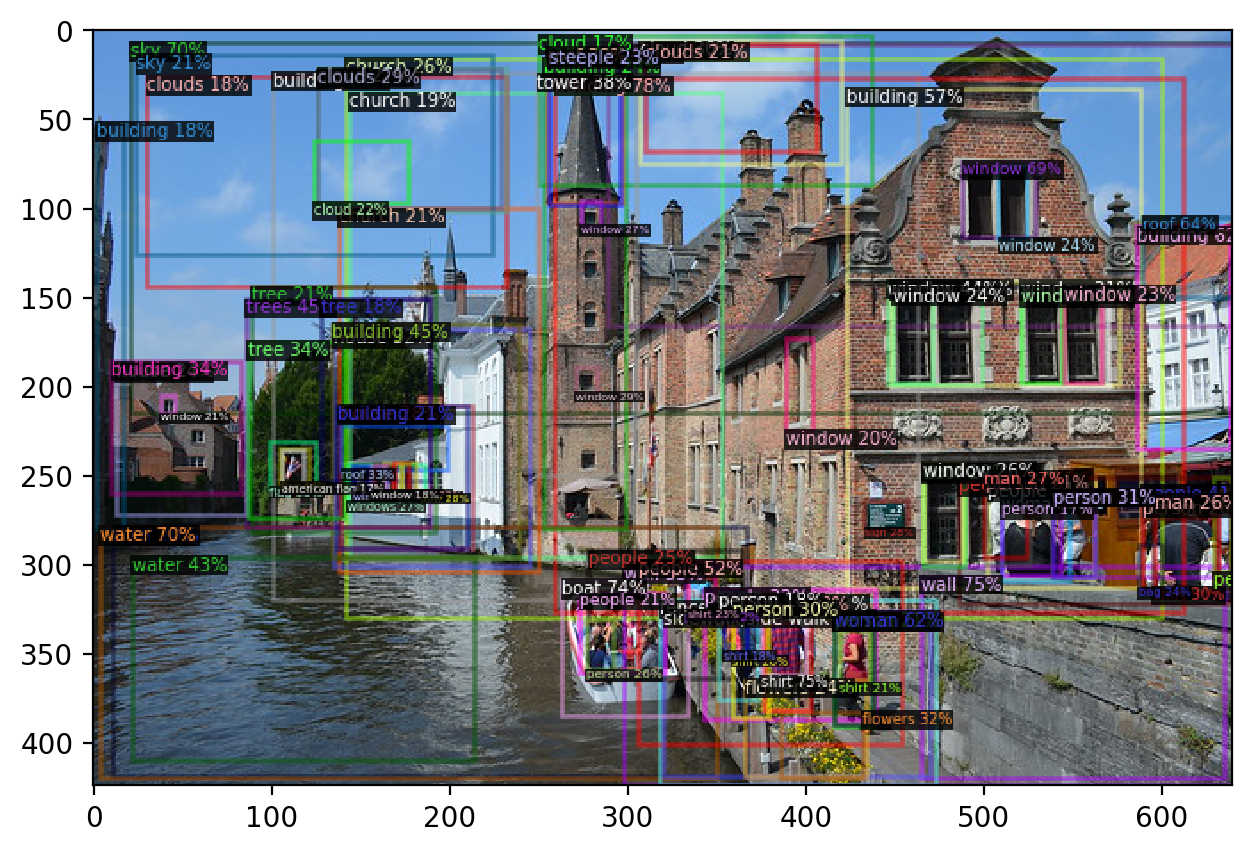

A boat in the water in front of a building.


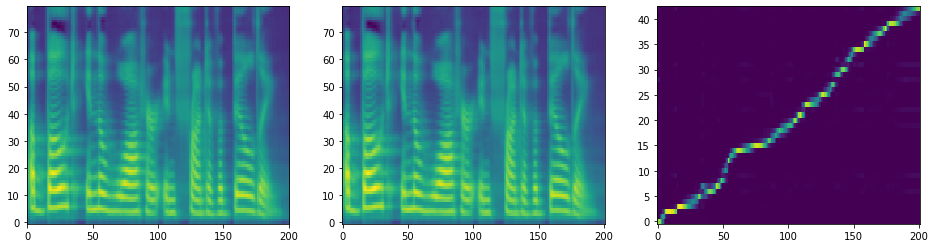

In [8]:
audio = bertron("http://farm8.staticflickr.com/7441/9529852393_8718973186_z.jpg", 
                visualize=True)
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

In [9]:
audio = bertron.tts('Here we see the detector output, the description in natural language, the mel spectograms and an alignment graph')
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

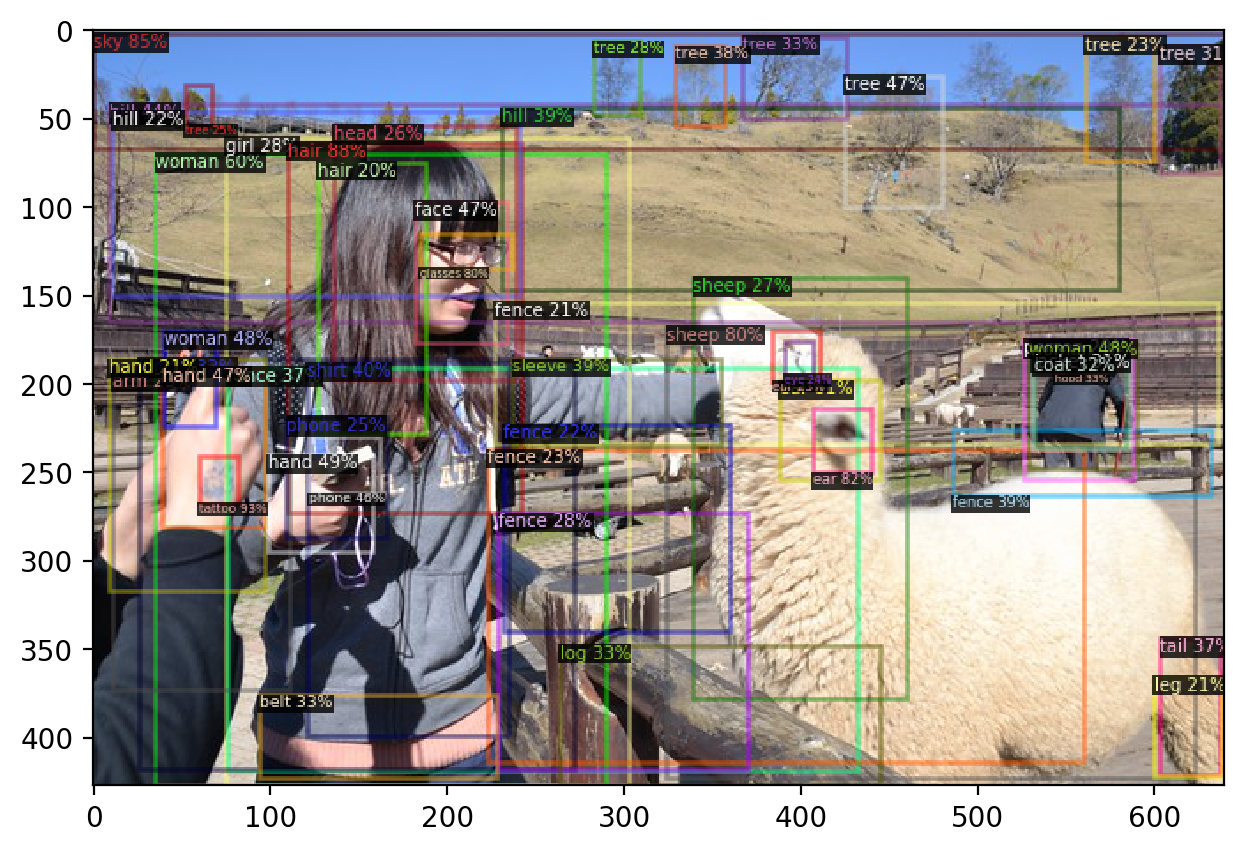

A woman standing next to a sheep in a fence.


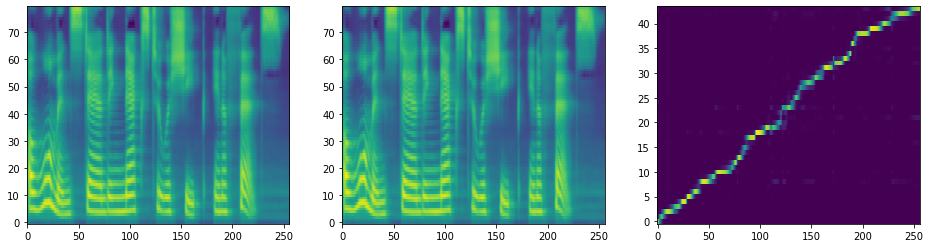

In [11]:
# Let's reduce the visual output a bit

audio = bertron("http://farm9.staticflickr.com/8468/8417250086_2fc1d0cf19_z.jpg", 
                visualize=True, viz_top_n=50)
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

In [10]:
audio = bertron.tts('It is also possible to just use a Bertron\'s components (captioning and tts) for your needs, no need to reload')
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

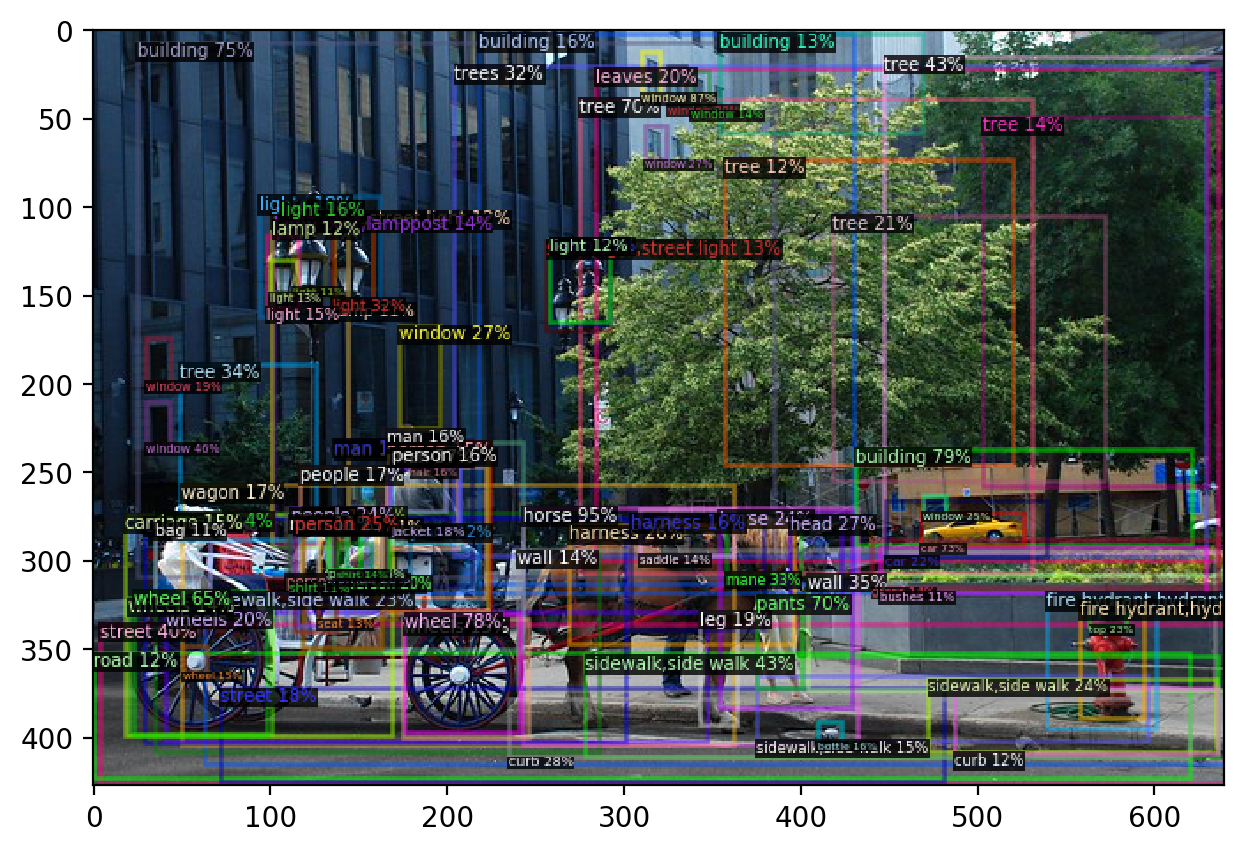

'A couple of horses and a carriage on a street.'

In [11]:
bertron.captioner("http://farm2.staticflickr.com/1189/1324949412_40e6f65020_z.jpg", 
                  visualize=True)

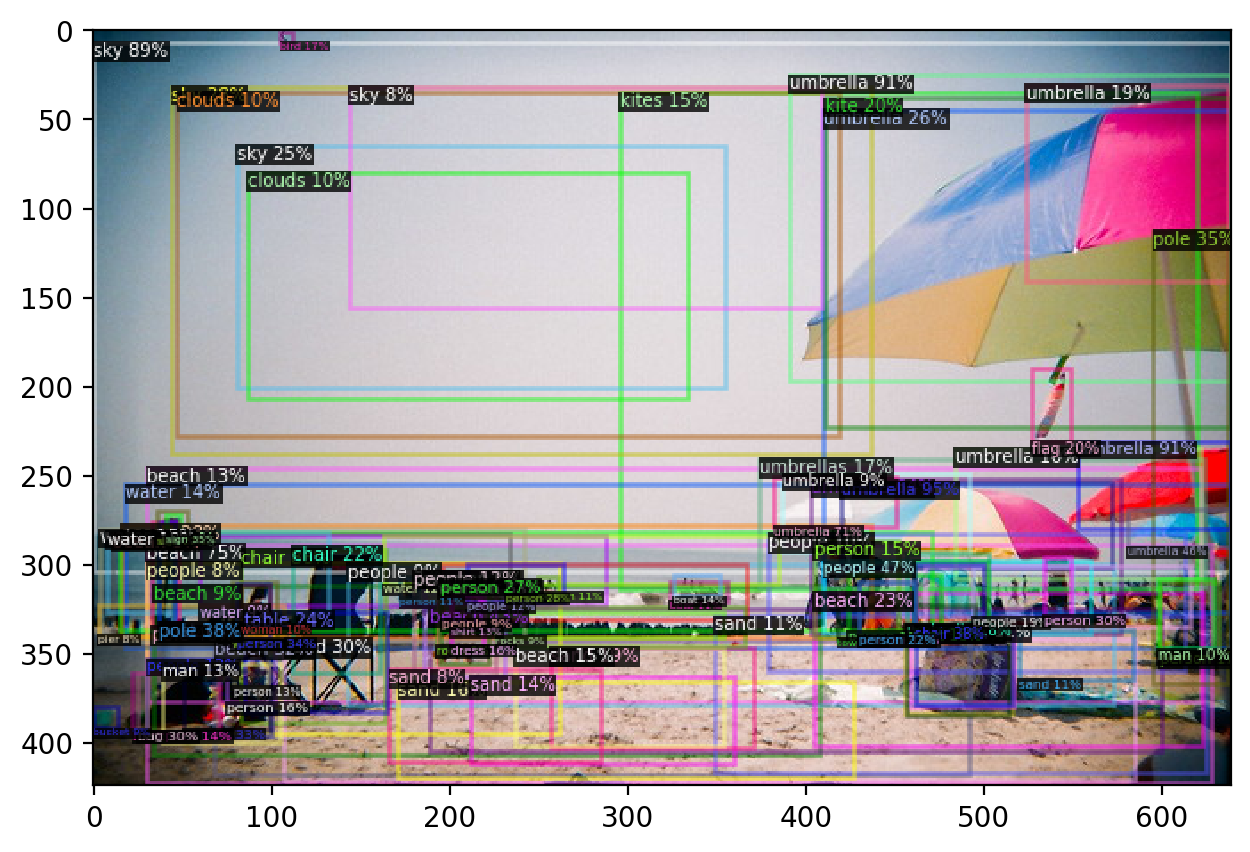

'A bunch of colorful umbrellas on the beach.'

In [12]:
bertron.captioner("http://farm7.staticflickr.com/6149/6017811617_6a63103d23_z.jpg",
                  visualize=True)

In [13]:
audio = bertron.tts("This is a random sentence. I was not generated by an image, sorry about the sound artifacts.")
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)

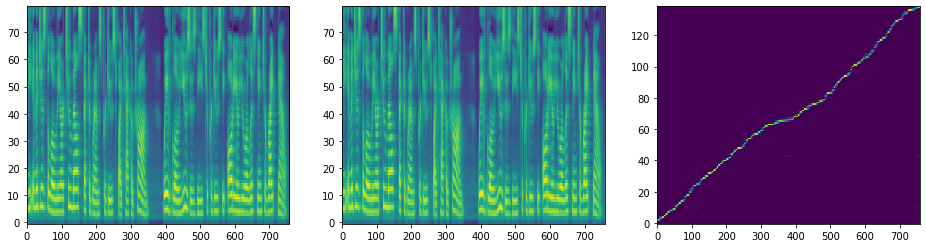

In [14]:
audio = bertron.tts("The images below me are 2 mel spectograms produced by taco tron, waveglow uses these to produce the audio you are listening to right now.",
                    visualize=True)
ipd.Audio(audio.cpu().numpy(), rate=SAMPLING_RATE)